Create Aggregate Features

In [1]:
import pandas as pd
df = pd.read_csv('../data/data.csv')

In [2]:
customer_aggregates = df.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AvgTransactionAmount=('Amount', 'mean'),
    TransactionCount=('TransactionId', 'count'),
    StdDevTransactionAmount=('Amount', 'std')  
).reset_index()

customer_aggregates['StdDevTransactionAmount'].fillna(0, inplace=True)

print(customer_aggregates.describe())


       TotalTransactionAmount  AvgTransactionAmount  TransactionCount  \
count            3.742000e+03          3.742000e+03       3742.000000   
mean             1.717377e+05          1.571562e+04         25.564404   
std              2.717305e+06          1.676991e+05         96.929602   
min             -1.049000e+08         -4.250000e+05          1.000000   
25%              4.077438e+03          1.000000e+03          2.000000   
50%              2.000000e+04          2.583846e+03          7.000000   
75%              7.996775e+04          4.877614e+03         20.000000   
max              8.345124e+07          8.601821e+06       4091.000000   

       StdDevTransactionAmount  
count             3.742000e+03  
mean              1.360517e+04  
std               9.689344e+04  
min               0.000000e+00  
25%               5.011411e+02  
50%               3.184898e+03  
75%               6.745369e+03  
max               3.309916e+06  


C:\Users\USER\AppData\Local\Temp\ipykernel_17924\1904682079.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_aggregates['StdDevTransactionAmount'].fillna(0, inplace=True)


Extract Features

In [3]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

print(df[['TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].describe())

       TransactionHour  TransactionDay  TransactionMonth  TransactionYear
count     95662.000000    95662.000000      95662.000000     95662.000000
mean         12.447722       15.902898          6.566233      2018.497115
std           4.846964        8.962822          5.224310         0.499994
min           0.000000        1.000000          1.000000      2018.000000
25%           8.000000        8.000000          1.000000      2018.000000
50%          13.000000       16.000000         11.000000      2018.000000
75%          17.000000       24.000000         12.000000      2019.000000
max          23.000000       31.000000         12.000000      2019.000000


In [4]:
print(df.columns)
print(df.dtypes)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear'],
      dtype='object')
TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
Pri

Encode Categorical Variables

   cat__ProductCategory_airtime  cat__ProductCategory_data_bundles  \
0                           1.0                                0.0   
1                           0.0                                0.0   
2                           1.0                                0.0   
3                           0.0                                0.0   
4                           0.0                                0.0   

   cat__ProductCategory_financial_services  cat__ProductCategory_movies  \
0                                      0.0                          0.0   
1                                      1.0                          0.0   
2                                      0.0                          0.0   
3                                      0.0                          0.0   
4                                      1.0                          0.0   

   cat__ProductCategory_other  cat__ProductCategory_ticket  \
0                         0.0                          0.0   
1   

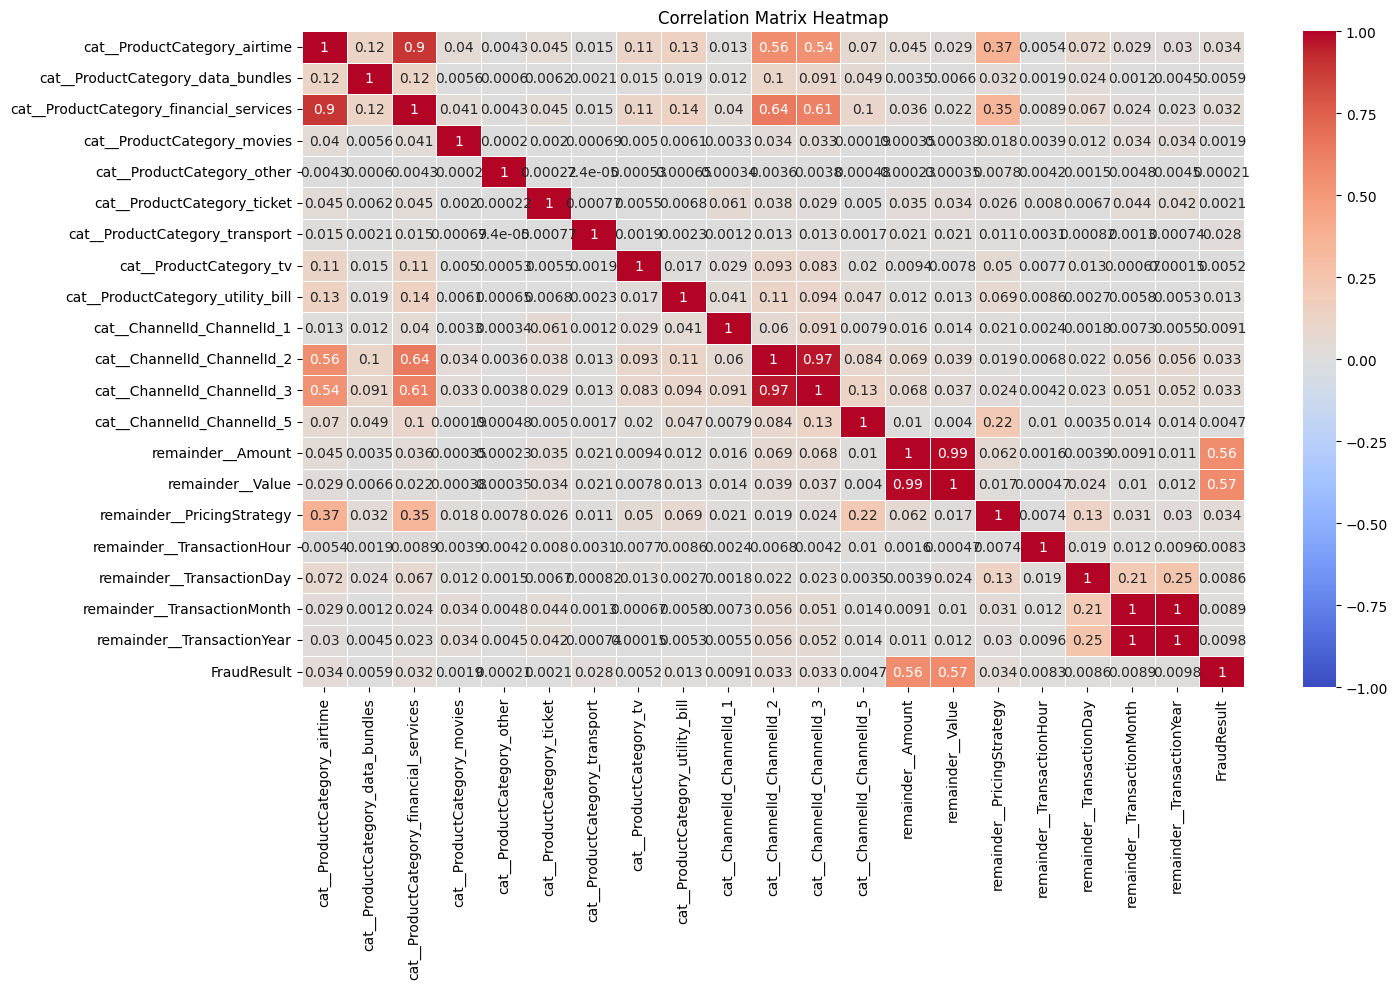


Summary Statistics:
       cat__ProductCategory_airtime  cat__ProductCategory_data_bundles  \
count                  95662.000000                       95662.000000   
mean                       0.470688                           0.016861   
std                        0.499143                           0.128753   
min                        0.000000                           0.000000   
25%                        0.000000                           0.000000   
50%                        0.000000                           0.000000   
75%                        1.000000                           0.000000   
max                        1.000000                           1.000000   

       cat__ProductCategory_financial_services  cat__ProductCategory_movies  \
count                             95662.000000                 95662.000000   
mean                                  0.474640                     0.001829   
std                                   0.499359                     0.042732

c:\Users\USER\Documents\OPLearning\10_Academy\Week_6\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF):
                                    feature         VIF
0              cat__ProductCategory_airtime         inf
1         cat__ProductCategory_data_bundles         inf
2   cat__ProductCategory_financial_services         inf
3               cat__ProductCategory_movies         inf
4                cat__ProductCategory_other         inf
5               cat__ProductCategory_ticket         inf
6            cat__ProductCategory_transport         inf
7                   cat__ProductCategory_tv         inf
8         cat__ProductCategory_utility_bill         inf
9                cat__ChannelId_ChannelId_1         inf
10               cat__ChannelId_ChannelId_2         inf
11               cat__ChannelId_ChannelId_3         inf
12               cat__ChannelId_ChannelId_5         inf
19               remainder__TransactionYear  173.327831
18              remainder__TransactionMonth  169.990708
14                         remainder__Value   61.086296
13            

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

categorical_columns = ['ProductCategory', 'ChannelId']
fraud_column = 'FraudResult'
numerical_columns = ['Amount', 'Value', 'PricingStrategy', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']

ct_categorical = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns)
    ],
    remainder='passthrough'  
)

X = ct_categorical.fit_transform(df[categorical_columns + numerical_columns])

df_encoded = pd.DataFrame(X, columns=ct_categorical.get_feature_names_out(categorical_columns + numerical_columns))

fraud_result_encoder = LabelEncoder()
df_encoded[fraud_column] = fraud_result_encoder.fit_transform(df[fraud_column])


print(df_encoded.head())

print("\nColumn Information:")
print(df_encoded.dtypes)

print("\nMissing Values:")
print(df_encoded.isnull().sum())

correlation_matrix = df_encoded.corr().abs()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print(df_encoded.describe())

vif_data = pd.DataFrame()
vif_data["feature"] = df_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

vif_data = vif_data.sort_values("VIF", ascending=False)
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Normalize/Standardize Numerical Features

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def get_numerical_columns(df):
    return df.select_dtypes(include=np.number).columns.tolist()

numerical_columns = get_numerical_columns(df)

normalized_df_minmax = df.copy()
normalized_df_standard = df.copy()

scaler_minmax = MinMaxScaler()
normalized_df_minmax[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])

scaler_standard = StandardScaler()
normalized_df_standard[numerical_columns] = scaler_standard.fit_transform(df[numerical_columns])

print("Normalized Numerical Features (MinMaxScaler):\n", normalized_df_minmax[numerical_columns].describe())
print("\nNormalized Numerical Features (StandardScaler):\n", normalized_df_standard[numerical_columns].describe())


Normalized Numerical Features (MinMaxScaler):
        CountryCode        Amount         Value  PricingStrategy   FraudResult  \
count      95662.0  95662.000000  95662.000000     95662.000000  95662.000000   
mean           0.0      0.092529      0.001002         0.563994      0.002018   
std            0.0      0.011333      0.012462         0.183231      0.044872   
min            0.0      0.000000      0.000000         0.000000      0.000000   
25%            0.0      0.091907      0.000028         0.500000      0.000000   
50%            0.0      0.092004      0.000101         0.500000      0.000000   
75%            0.0      0.092169      0.000506         0.500000      0.000000   
max            0.0      1.000000      1.000000         1.000000      1.000000   

       TransactionHour  TransactionDay  TransactionMonth  TransactionYear  
count     95662.000000    95662.000000      95662.000000     95662.000000  
mean          0.541205        0.496763          0.506021         0.4971

Aggregating Transaction Data

In [9]:
aggregated_df = df.groupby('CustomerId').agg({
    'Amount': ['sum', 'mean', 'std'],
    'Value': ['sum', 'mean', 'std'],
    'FraudResult': 'sum',  
    'TransactionId': 'count' 
}).reset_index()

aggregated_df.columns = ['CustomerId', 'TotalAmount', 'AvgAmount', 'StdAmount', 'TotalValue', 'AvgValue', 'StdValue', 'FraudulentTransactionCount', 'TransactionCount']

aggregated_df.head()


,CustomerId,TotalAmount,AvgAmount,StdAmount,TotalValue,AvgValue,StdValue,FraudulentTransactionCount,TransactionCount
0,CustomerId_1,-10000.0,-10000.000000,NaN,10000,10000.000000,NaN,0,1
1,CustomerId_10,-10000.0,-10000.000000,NaN,10000,10000.000000,NaN,0,1
2,CustomerId_1001,20000.0,4000.000000,6558.963333,30400,6080.000000,4100.243895,0,5
3,CustomerId_1002,4225.0,384.090909,560.498966,4775,434.090909,518.805446,0,11
4,CustomerId_1003,20000.0,3333.333333,6030.478146,32000,5333.333333,3945.461528,0,6


Exploring Fraud Patterns Over Time

C:\Users\USER\AppData\Local\Temp\ipykernel_17924\1182635806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TransactionHour', y='FraudResult', data=fraud_by_hour, palette='viridis')


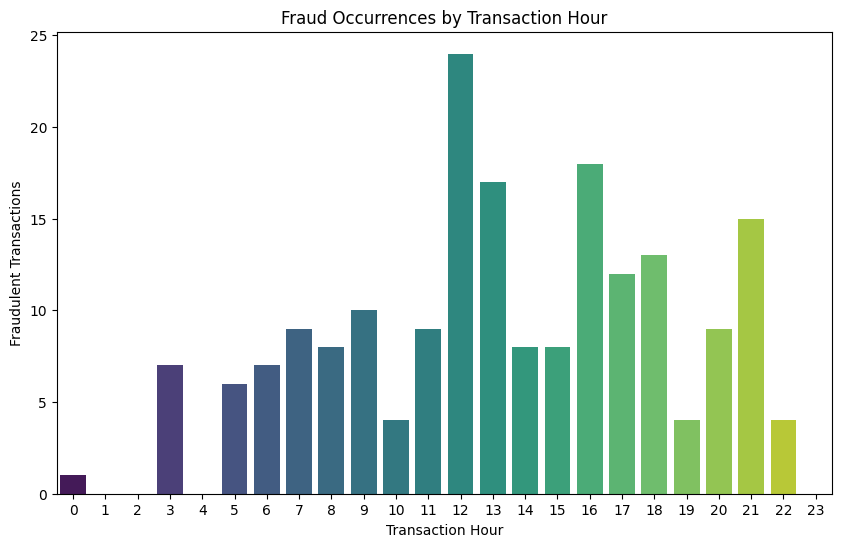

In [10]:
fraud_by_hour = df.groupby('TransactionHour')['FraudResult'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionHour', y='FraudResult', data=fraud_by_hour, palette='viridis')
plt.title('Fraud Occurrences by Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Fraudulent Transactions')
plt.show()


Correlation Analysis of Time Features with Amount, Value, and Fraud

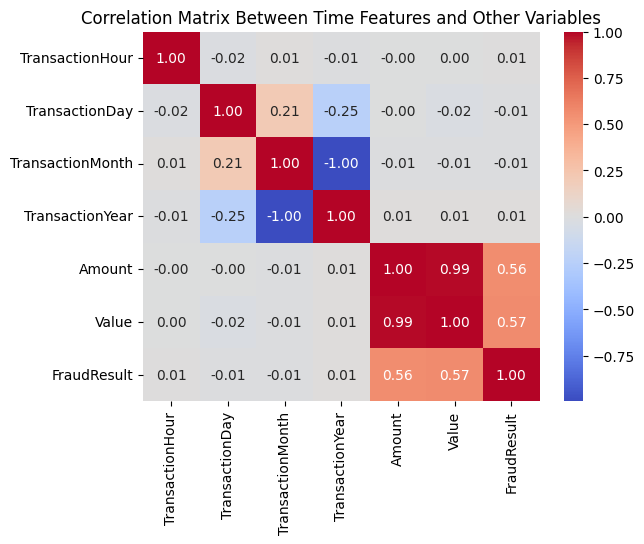

In [11]:
time_corr = df[['TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'Amount', 'Value', 'FraudResult']].corr()

sns.heatmap(time_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Time Features and Other Variables')
plt.show()


Identifying High-Risk Transaction Groups

C:\Users\USER\AppData\Local\Temp\ipykernel_17924\3319892760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_risk_segment = df.groupby('RiskSegment')['FraudResult'].sum().reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_17924\3319892760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RiskSegment', y='FraudResult', data=fraud_by_risk_segment, palette='plasma')


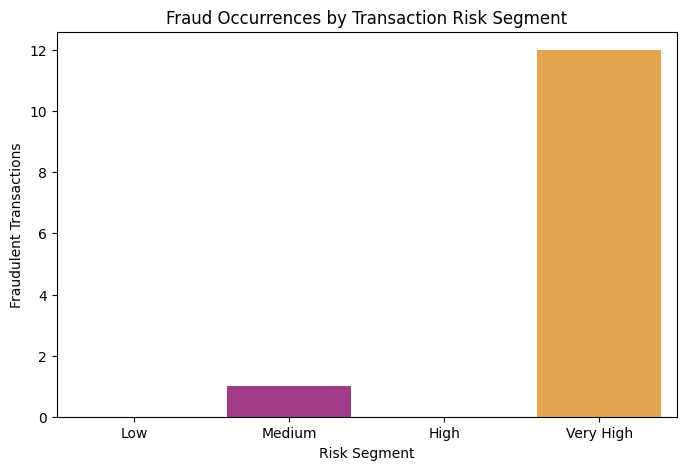

In [12]:
df['RiskSegment'] = pd.cut(df['Amount'], bins=[0, 100, 1000, 10000, 100000], labels=['Low', 'Medium', 'High', 'Very High'])

fraud_by_risk_segment = df.groupby('RiskSegment')['FraudResult'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='RiskSegment', y='FraudResult', data=fraud_by_risk_segment, palette='plasma')
plt.title('Fraud Occurrences by Transaction Risk Segment')
plt.xlabel('Risk Segment')
plt.ylabel('Fraudulent Transactions')
plt.show()

Default Estimator and WoE Binning

Create RFMS Variables

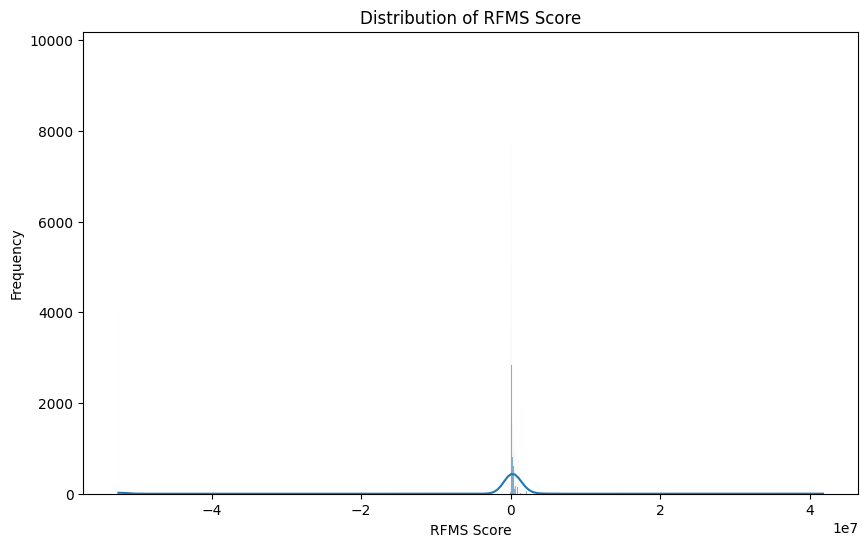

In [13]:
df['Recency'] = (df['TransactionStartTime'].max() - df['TransactionStartTime']).dt.days

df['Frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')

df['Monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')

df['RFMS_Score'] = df['Recency'] * 0.2 + df['Frequency'] * 0.3 + df['Monetary'] * 0.5

plt.figure(figsize=(10, 6))
sns.histplot(df['RFMS_Score'], kde=True)
plt.title('Distribution of RFMS Score')
plt.xlabel('RFMS Score')
plt.ylabel('Frequency')
plt.show()


Establish a Boundary for Good and Bad Classification

In [16]:
threshold = df['RFMS_Score'].median()

df['CreditLabel'] = np.where(df['RFMS_Score'] >= threshold, 'Good', 'Bad')

df[['CustomerId', 'RFMS_Score', 'CreditLabel']].head()


,CustomerId,RFMS_Score,CreditLabel
0,CustomerId_4406,55014.575,Bad
1,CustomerId_4406,55014.575,Bad
2,CustomerId_4683,518.600,Bad
3,CustomerId_988,114393.000,Good
4,CustomerId_988,114393.000,Good


Perform Weight of Evidence (WoE) Binning

In [17]:
import scorecardpy as sc
df['RiskTarget'] = np.where(df['CreditLabel'] == 'Good', 0, 1)  # Good -> 0, Bad -> 1

features = ['Recency', 'Frequency', 'Monetary', 'Amount', 'Value', 'PricingStrategy']

bins = sc.woebin(df[features + ['RiskTarget']], y='RiskTarget')

df_woe = sc.woebin_ply(df, bins)

df_woe.head()

[INFO] creating woe binning ...


c:\Users\USER\Documents\OPLearning\10_Academy\Week_6\venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\USER\Documents\OPLearning\10_Academy\Week_6\venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\USER\Documents\OPLearning\10_Academy\Week_6\venv\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default o

[INFO] converting into woe values ...


,TransactionId,ChannelId,TransactionMonth,TransactionHour,BatchId,AccountId,CustomerId,RiskSegment,TransactionDay,CurrencyCode,...,CountryCode,RiskTarget,TransactionStartTime,SubscriptionId,Recency_woe,Monetary_woe,Frequency_woe,Amount_woe,Value_woe,PricingStrategy_woe
0,TransactionId_76871,ChannelId_3,11,2,BatchId_36123,AccountId_3957,CustomerId_4406,Medium,15,UGX,...,256,1,2018-11-15 02:18:49+00:00,SubscriptionId_887,-0.097656,0.0,-0.092604,-0.112102,-0.009342,-0.203105
1,TransactionId_73770,ChannelId_2,11,2,BatchId_15642,AccountId_4841,CustomerId_4406,NaN,15,UGX,...,256,1,2018-11-15 02:19:08+00:00,SubscriptionId_3829,-0.097656,0.0,-0.092604,-0.305226,-0.300424,-0.203105
2,TransactionId_26203,ChannelId_3,11,2,BatchId_53941,AccountId_4229,CustomerId_4683,Medium,15,UGX,...,256,1,2018-11-15 02:44:21+00:00,SubscriptionId_222,-0.097656,0.0,3.040416,-0.112102,-0.009342,-0.203105
3,TransactionId_380,ChannelId_3,11,3,BatchId_102363,AccountId_648,CustomerId_988,Very High,15,UGX,...,256,0,2018-11-15 03:32:55+00:00,SubscriptionId_2185,-0.097656,0.0,1.476350,-1.088228,0.162001,-0.203105
4,TransactionId_28195,ChannelId_2,11,3,BatchId_38780,AccountId_4841,CustomerId_988,NaN,15,UGX,...,256,0,2018-11-15 03:34:21+00:00,SubscriptionId_3829,-0.097656,0.0,1.476350,0.977820,-0.009342,-0.203105


Univariate Analysis with WoE

{'Recency': <Figure size 640x480 with 2 Axes>,
 'Monetary': <Figure size 640x480 with 2 Axes>,
 'Frequency': <Figure size 640x480 with 2 Axes>,
 'Amount': <Figure size 640x480 with 2 Axes>,
 'Value': <Figure size 640x480 with 2 Axes>,
 'PricingStrategy': <Figure size 640x480 with 2 Axes>}

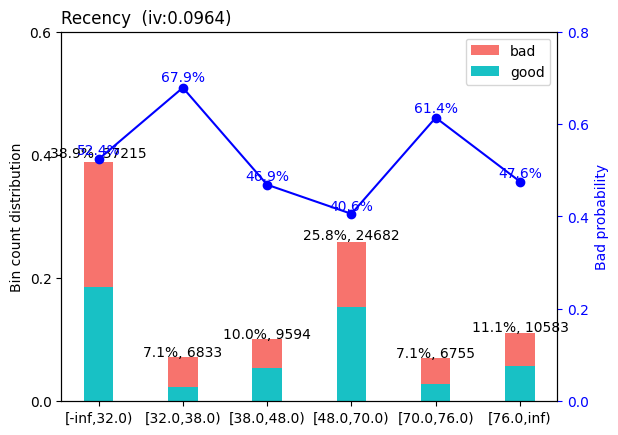

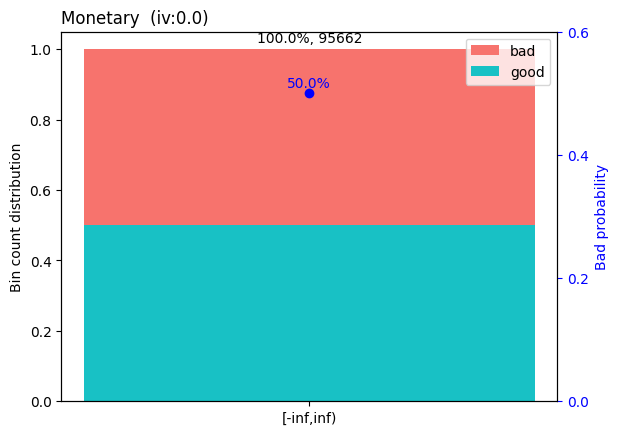

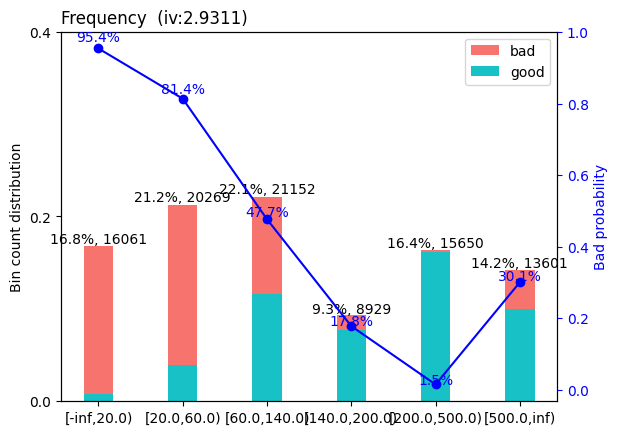

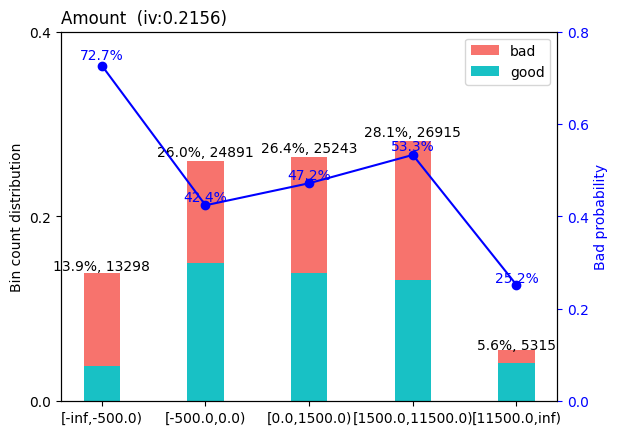

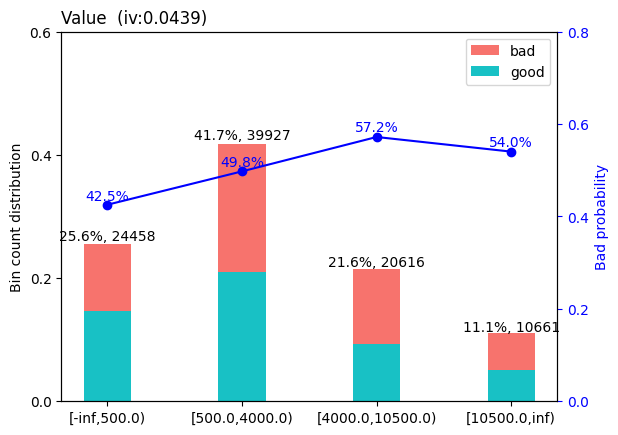

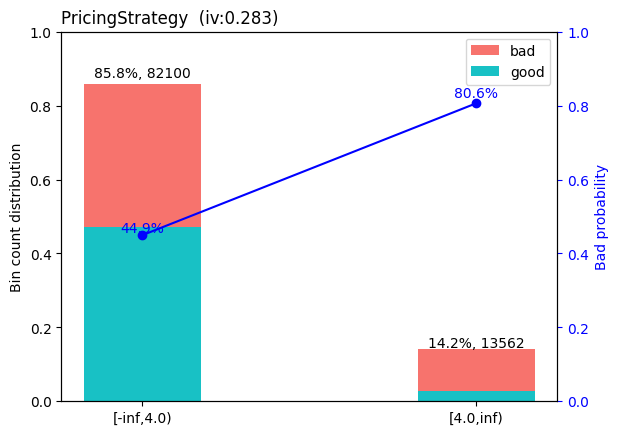

In [18]:
sc.woebin_plot(bins)